In [1]:
import json
from modules.CKDE import load_timeseries, from_1D_to_2D, convolve_2D_image, plot_summary

# Applying CKDE to an epileptic spike

## Load a raw time series and plot it

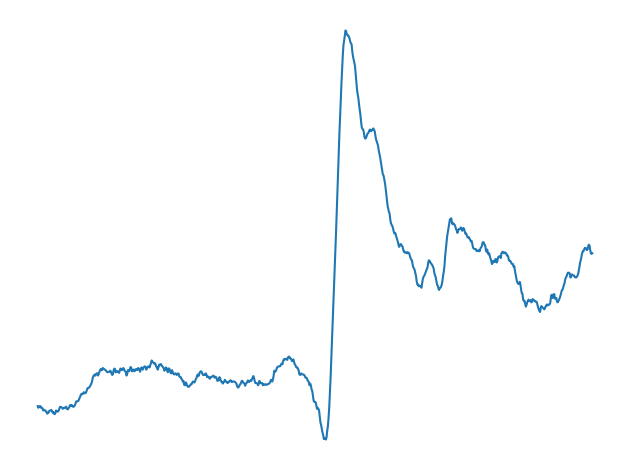

In [2]:

### Init parameters (root is the path to the folder you have downloaded)
exemple_event_to_plot = 5

### Get a timeseries filepath (look in the folder you have downloaded)
timeseries_folderpath =  r"input_data/events_signal_data"
timeserie_filename = f"event_{exemple_event_to_plot}.txt"

### Load a timeseries from the sample data provided with this program (1D)
signal = load_timeseries(timeseries_folderpath, timeserie_filename) 
# or:
#signal = random_signal_simulation()

## Get the timeseries info

In [3]:
meta_data = json.load(open(r"input_data/events_info.json"))
sfreq = meta_data["events_info"][exemple_event_to_plot]["sampling_frequency"]

for key, value in meta_data["events_info"][exemple_event_to_plot].items():
    print(f"{key}: {value}")

ID: 6
type: Spk-alone
patient_num: 02
chan_type: macro
chan_name: of2-of3
sampling_frequency: 2048
eventTime_inFilename_(s): 401.2
event_duration_(s): 0.0
extracted_signal_duration_(ms): 400.0
scale_unit: uV
filename: sub-002_ses-MacroBipolar01_task-EPIFAR_run-01_ieeg.edf
eventOnset_inDatabase_(ms): None
eventEnd_inDatabase_(ms): None
Detection_predictions: [0.0, 0.0]
predicted_type: Test


## Convert it to a 2D signal

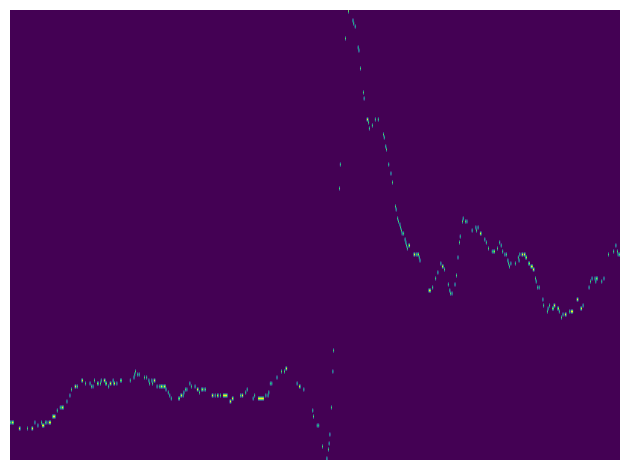

In [4]:
image_2D = from_1D_to_2D(signal, bandwidth=1, resolution=150, plot_result=True)

## Convolve the 2D signal

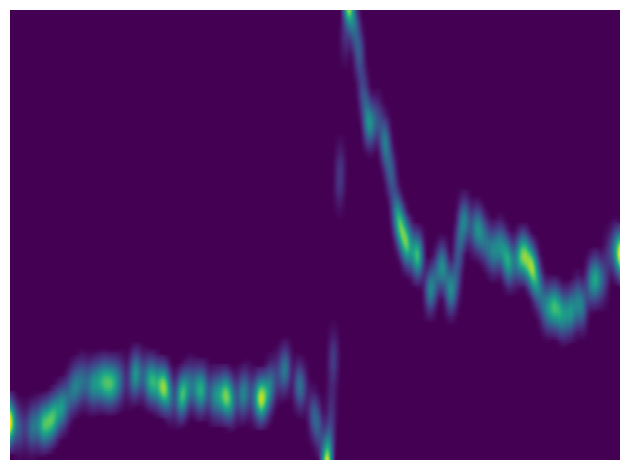

In [5]:
image_2D_convolved = convolve_2D_image(image_2D, convolution = "gaussian custom", plot_result=True)

## Plot summary

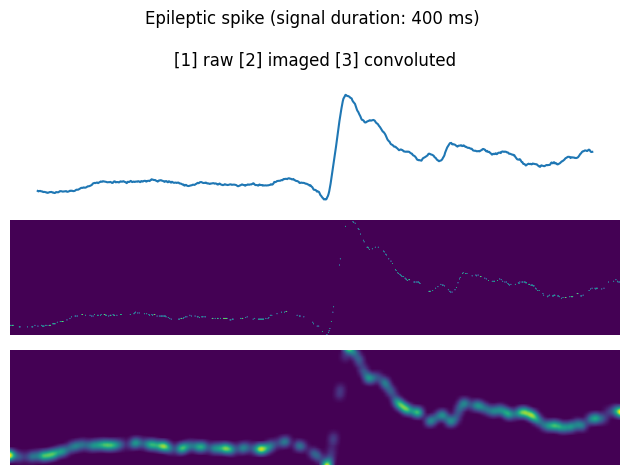

In [6]:
fig_name = "Epileptic spike (signal duration: 400 ms) \n\n[1] raw [2] imaged [3] convoluted"
plot_summary(signal, image_2D, image_2D_convolved, fig_name)